In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [4]:
data=pd.read_csv("C:\\Users\\Laxminarayana\\Downloads\\delivery_time (1).csv")
data


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [17]:
x=data.iloc[:,0:1]
x
y=data.iloc[:,1:2]
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [19]:
y=data.iloc[:,1:2]
y

,Sorting Time
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [6]:
data.info()#to check wether there is any null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


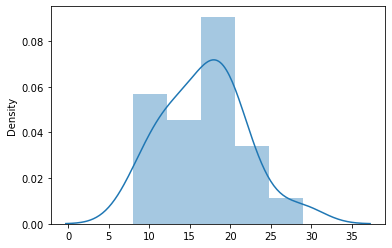

In [18]:
x=sns.distplot(x)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

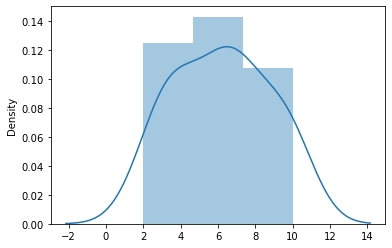

In [22]:
sns.distplot(y)


<AxesSubplot:>

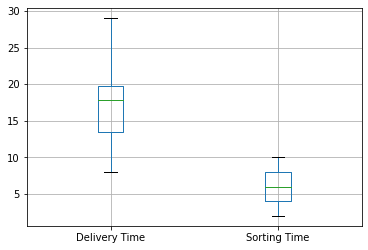

In [24]:
data[['Delivery Time','Sorting Time']].boxplot()#to check the outlier

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

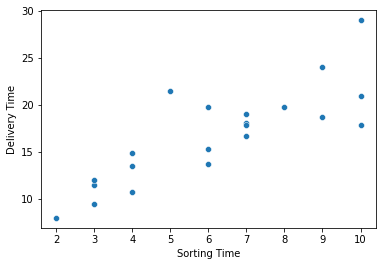

In [25]:
sns.scatterplot(y='Delivery Time', x='Sorting Time', data=data) ##Scatter plot

In [28]:
data.corr()  #there is a moderate correlation between delivery time and sorting time.

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


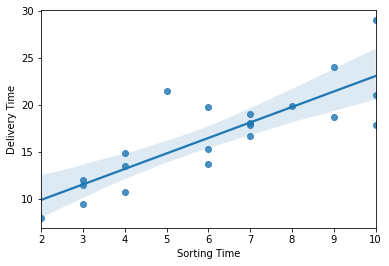

In [29]:
sns.regplot(x='Sorting Time', y='Delivery Time', data=data)
plt.show()

In [37]:
data.rename(columns={"Delivery Time":"dt","Sorting Time":"st"},inplace=True)  
model1=smf.ols('dt~st',data=data).fit()
model1.params



Intercept    6.582734
st           1.649020
dtype: float64

In [38]:
(model1.tvalues,"\n",model1.pvalues) ##Pvalues is less then 0.05(0.00115) then it is significant

(Intercept    3.823349
 st           6.387447
 dtype: float64,
 '\n',
 Intercept    0.001147
 st           0.000004
 dtype: float64)

In [39]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 10 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        20:12:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import numpy as np
df_st=data.iloc[:,1]  

model1.predict(df_st) # Best fit line 
#Predicted delivery time by using sorting time

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [41]:
print(model1.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
st         1.108673   2.189367
